<a href="https://www.kaggle.com/code/katzurasharma/vgg-16-modified?scriptVersionId=117185885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-859.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-158.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-10121.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-1811.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-97.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-1088.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-5663.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-6328.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-8410.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-5641.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal/Normal-4852.png
/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Da

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
import seaborn as sns

In [6]:

path_normal = "/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/Normal"
path_covid = "/kaggle/input/whowhohaaha/archive/COVID-19_Radiography_Dataset/COVID"
len_normal = len(os.listdir(path_normal))
len_covid = len(os.listdir(path_covid))


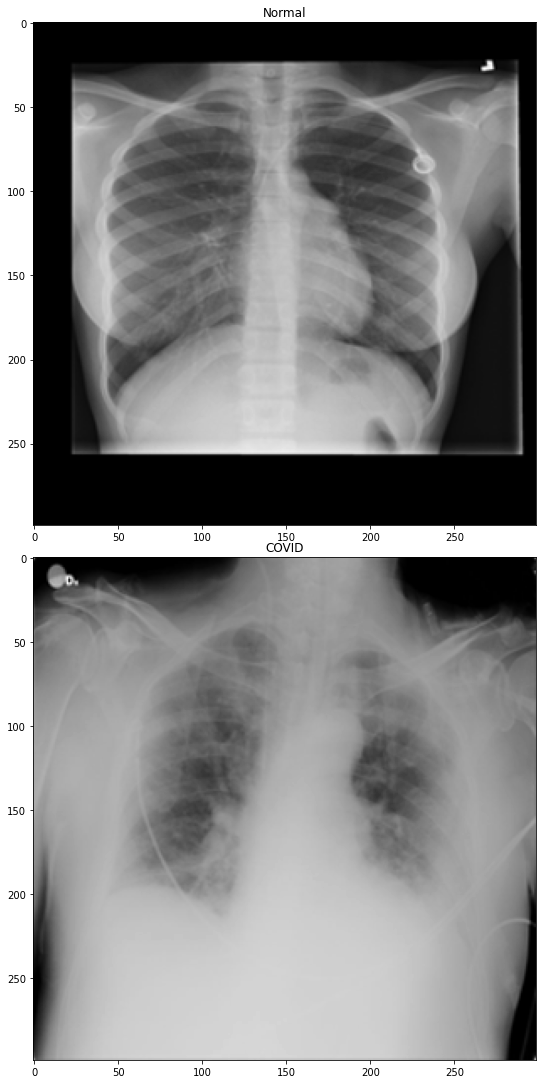

In [7]:
import glob
labels = ['Normal', 'COVID']
img1 = path_normal+"/Normal-1.png"
img2 = path_covid+"/COVID-1.png"
imgs = [img1, img2]

fig, ax = plt.subplots(2, figsize=(15, 15))
ax = ax.ravel()
plt.tight_layout()

for i in range(0,2):

    ax[i].imshow(plt.imread(imgs[i]), cmap='gray')
    ax[i].set_title(labels[i])

# PIL to enhance images

In [8]:
from PIL import Image, ImageOps
def resize_image(imgpath):
    img = np.array(ImageOps.grayscale(Image.open(imgpath)).resize((64, 64), Image.ANTIALIAS))
    return img

### Using defined function to resize images

In [9]:
import os
x_ = list()
y = list()

for i in os.listdir(path_normal):
    try:
        imgpath = path_normal+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(0)
    except:
        None
        
for i in os.listdir(path_covid):
    try:
        imgpath = path_covid+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(1)
    except:
        None

x_ = np.array(x_)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Split test, train, validation data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.2,random_state = 20)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 40)

In [14]:
from keras.utils.np_utils import to_categorical

y = to_categorical(y,num_classes = 2)

classNames = ["normal","COVID_19"]
print(classNames)

['normal', 'COVID_19']


In [15]:
unique, counts = np.unique(y_train.argmax(axis=1), return_counts=True)
uniqueVal, countsVal = np.unique(y_val.argmax(axis=1), return_counts=True)
dict(zip(unique, counts))

{0: 6897, 1: 2492}

In [16]:
x_train = x_train.reshape(x_train.shape[0], *(64, 64, 1))
x_test = x_test.reshape(x_test.shape[0], *(64, 64, 1))

In [17]:
x_train.shape

(9389, 64, 64, 1)

In [18]:
dict(zip(uniqueVal, countsVal))

{0: 1228, 1: 429}

In [ ]:
# model1 = Sequential()

# model1.add(Conv2D(32, (3, 3), input_shape = (64,64,1), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(64, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(128, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Flatten())

# model1.add(Dense(128, activation = 'relu'))
# model1.add(Dense(2, activation = 'sigmoid')) 
# DEnse(2 (cuz 2 classes))

In [ ]:
# model1.compile(loss ='binary_crossentropy', optimizer='adam',metrics =['acc'])
# model1.summary()

In [ ]:
# history1 = model1.fit(x_train, y_train, batch_size = 32, epochs = 20, verbose = 1, validation_data = (x_test, y_test))

In [ ]:
# model1.save('model1.hdf5')

# Build model VGG16 # 

In [20]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Flatten
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [21]:
modelvgg = Sequential()

modelvgg.add(Conv2D(32, (3, 3), input_shape = (64,64,1), activation='relu'))
modelvgg.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(MaxPooling2D((2, 2)))

modelvgg.add(SeparableConv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(SeparableConv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(BatchNormalization())
modelvgg.add(MaxPooling2D((2, 2)))

modelvgg.add(SeparableConv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(SeparableConv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(BatchNormalization())
modelvgg.add(MaxPooling2D((2, 2)))

modelvgg.add(SeparableConv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(SeparableConv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(BatchNormalization())
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(rate=0.2))

modelvgg.add(SeparableConv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(SeparableConv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelvgg.add(BatchNormalization())
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(rate=0.2))

modelvgg.add(Flatten())
modelvgg.add(Dense(512, activation="relu"))  
modelvgg.add(Dropout(rate=0.7))
modelvgg.add(Dense(128, activation="relu"))
modelvgg.add(Dropout(0.5))
modelvgg.add(Dense(2, activation="sigmoid"))
#     model  = Model(inputs=_input, outputs=output)
modelvgg.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])








# model1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(64, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(128, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Flatten())

# model1.add(Dense(128, activation = 'relu'))
# model1.add(Dense(25, activation = 'softmax'))

2023-01-24 12:03:41.268045: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Chnaging the layers name cuz it would clash during ensembled


In [22]:
for i, layer in enumerate(modelvgg.layers):
    layer._name = layer.name + str('asdf')

In [23]:
modelvgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2dasdf (Conv2D)          (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_1asdf (Conv2D)        (None, 62, 62, 16)        4624      
_________________________________________________________________
max_pooling2dasdf (MaxPoolin (None, 31, 31, 16)        0         
_________________________________________________________________
separable_conv2dasdf (Separa (None, 31, 31, 32)        688       
_________________________________________________________________
separable_conv2d_1asdf (Sepa (None, 31, 31, 32)        1344      
_________________________________________________________________
batch_normalizationasdf (Bat (None, 31, 31, 32)        128       
_________________________________________________________________
max_pooling2d_1asdf (MaxPool (None, 15, 15, 32)        0

In [24]:
history = modelvgg.fit(x_train, y_train, validation_data=(x_test, y_test),
                            batch_size=32, epochs=20)

2023-01-24 12:05:34.269482: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
294/294 [==============================] - 34s 110ms/step - loss: 0.3891 - accuracy: 0.8218 - val_loss: 0.9627 - val_accuracy: 0.2516
Epoch 2/20
294/294 [==============================] - 31s 107ms/step - loss: 0.2372 - accuracy: 0.9021 - val_loss: 0.5784 - val_accuracy: 0.6868
Epoch 3/20
294/294 [==============================] - 32s 108ms/step - loss: 0.1865 - accuracy: 0.9303 - val_loss: 0.2421 - val_accuracy: 0.8997
Epoch 4/20
294/294 [==============================] - 32s 108ms/step - loss: 0.1587 - accuracy: 0.9401 - val_loss: 0.2991 - val_accuracy: 0.8881
Epoch 5/20
294/294 [==============================] - 32s 108ms/step - loss: 0.1414 - accuracy: 0.9469 - val_loss: 0.2918 - val_accuracy: 0.8816
Epoch 6/20
294/294 [==============================] - 32s 109ms/step - loss: 0.1204 - accuracy: 0.9541 - val_loss: 0.2444 - val_accuracy: 0.9102
Epoch 7/20
294/294 [==============================] - 32s 109ms/step - loss: 0.1028 - accuracy: 0.9630 - val_loss: 0.2037 - val_ac

[INFO] evaluating network...


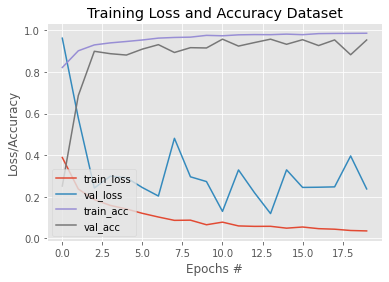

In [25]:
def showChartEpochAccuracy(history):
    # show a nicely formatted classification report
    print("[INFO] evaluating network...")
    # plot the training loss and accuracy
    N = 20
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy Dataset")
    plt.xlabel("Epochs #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show()

showChartEpochAccuracy(history)

In [26]:
mypredict = modelvgg.predict(x_test)
pred = np.argmax(mypredict, axis=-1)
print(pred)

[1 0 0 ... 0 0 1]


In [27]:
evalute = modelvgg.evaluate(x_test, y_test)

87/87 [==============================] - 2s 26ms/step - loss: 0.2379 - accuracy: 0.9540


In [30]:
print("Accuracy: {:.2f}%".format(evalute[1] * 100))  
print("Loss: {}".format(evalute[0])) 

Accuracy: 95.40%
Loss: 0.23786978423595428


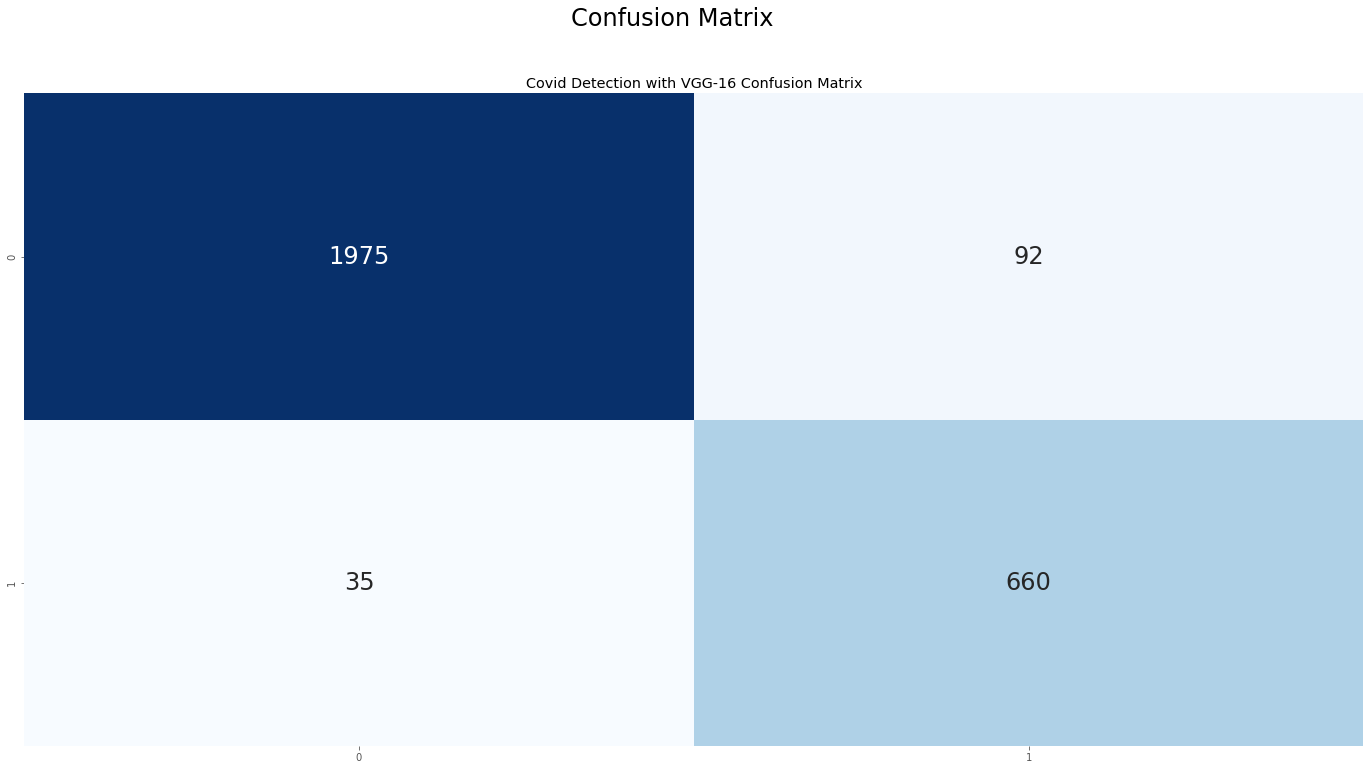

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


cm = confusion_matrix(y_test.argmax(axis=1), mypredict.argmax(axis=1))

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrix",fontsize=24)
plt.title("Covid Detection with VGG-16 Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


In [32]:
print ('Accuracy Score :',accuracy_score(y_test.argmax(axis=1), mypredict.argmax(axis=1)) )
print ('Report : ')
print (classification_report(y_test.argmax(axis=1), mypredict.argmax(axis=1)) )

Accuracy Score : 0.9540188269370021
Report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2067
           1       0.88      0.95      0.91       695

    accuracy                           0.95      2762
   macro avg       0.93      0.95      0.94      2762
weighted avg       0.96      0.95      0.95      2762



In [33]:
modelvgg.save("modelvgg2.h5")